
# Clothing Outfit (Fashion) Detection- Zoffers 
  

In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import fastbook
from fastai.vision.all import *
from fastai.vision.widgets import *

In [6]:
labels = pd.read_csv('images.csv')
labels.head()

image  sender_id     label   kids
0  4285fab0-751a-4b74-8e9b-43af05deee22        124  Not sure  False
1  ea7b6656-3f84-4eb3-9099-23e623fc1018        148   T-Shirt  False
2  00627a3f-0477-401c-95eb-92642cbe078d         94  Not sure  False
3  ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa         43   T-Shirt  False
4  3b86d877-2b9e-4c8b-a6a2-1d87513309d0        189     Shoes  False

In [4]:
labels['label'].value_counts()

T-Shirt       1011
Longsleeve     699
Pants          692
Shoes          431
Shirt          378
Dress          357
Outwear        312
Shorts         308
Not sure       228
Hat            171
Skirt          155
Polo           120
Undershirt     118
Blazer         109
Hoodie         100
Body            69
Other           67
Top             43
Blouse          23
Skip            12
Name: label, dtype: int64

# **Data Preprocessing**

## Import necessary libraries

In [3]:
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import plotly.express as px
        

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import adam_v2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Flatten, Dense, BatchNormalization, Activation,Dropout

from tensorflow.keras.utils import plot_model
from tensorflow.keras import Model

In [7]:
dataset = 'C:/Users/kotav/Desktop/zoffer/images_original'
print(f"There are {len(os.listdir(dataset))} images in  dataset")

There are 5762 images in  dataset


In [8]:
file_names = os.listdir(dataset)
file_names[:10]

['00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg',
 '00070a23-9faf-4682-8243-59f307880f4b.jpg',
 '001068a8-86c3-4029-a9d9-1e27015e7e64.jpg',
 '00143901-a14c-4600-960f-7747b4a3a8cd.jpg',
 '00149032-3dd6-426e-9bc0-d53032536a42.jpg',
 '00208c77-ee58-4b63-bc1a-b9b3aa4f1be0.jpg',
 '0028956e-9962-46f0-ad45-2c42f8a59d94.jpg',
 '002e88c2-e0ce-4a4b-9670-eddc3d99accc.jpg',
 '002eb5b8-6541-42a3-9596-0d94f7b866ae.jpg',
 '00342aff-ba69-4cf2-ae62-e00680e9547a.jpg']

In [10]:
labels = pd.read_csv('images.csv')
labels.head()


image  sender_id     label   kids
0  4285fab0-751a-4b74-8e9b-43af05deee22        124  Not sure  False
1  ea7b6656-3f84-4eb3-9099-23e623fc1018        148   T-Shirt  False
2  00627a3f-0477-401c-95eb-92642cbe078d         94  Not sure  False
3  ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa         43   T-Shirt  False
4  3b86d877-2b9e-4c8b-a6a2-1d87513309d0        189     Shoes  False

In [11]:
labels['image'] = labels['image']+'.jpg'
labels1 = labels[['image', 'label']]

In [12]:
labels1.head()

image     label
0  4285fab0-751a-4b74-8e9b-43af05deee22.jpg  Not sure
1  ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg   T-Shirt
2  00627a3f-0477-401c-95eb-92642cbe078d.jpg  Not sure
3  ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg   T-Shirt
4  3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg     Shoes

In [13]:
labels1['image']

0       4285fab0-751a-4b74-8e9b-43af05deee22.jpg
1       ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg
2       00627a3f-0477-401c-95eb-92642cbe078d.jpg
3       ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg
4       3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg
                          ...                   
5398    dfd4079d-967b-4b3e-8574-fbac11b58103.jpg
5399    befa14be-8140-4faf-8061-1039947e329d.jpg
5400    5379356a-40ee-4890-b416-2336a7d84061.jpg
5401    65507fb8-3456-4c15-b53e-d1b03bf71a59.jpg
5402    32b99302-cec7-4dec-adfa-3d4029674209.jpg
Name: image, Length: 5403, dtype: object

The dataset provided here contains 5000+ high resolution images of clothes.

The model is designed based on this dataset to distinguish among various types of clothing. This dataset contains two different variables identifying the piece of clothing - the first variable determines if the image contains a children's clothing and the second variable names the item. After the model has been designed, iPython widgets are used to test the model which can then be deployed onto a server for full functioning end-to-end application

The 'image' column contains the names of the images. This will be mapped to the folder they are stored at to access them while creating the model. The 'label' column identifies the piece of clothing whereas the 'kids' column identifies if the clothing is for children or not.

In [68]:
labels1 = labels1.drop(labels1[labels1['image'].isin(corrupted)].index, axis=0)

In [15]:
fig = px.bar(labels1['label'].value_counts())
fig.show()


In [16]:
classes = list(labels1['label'].unique())
print(len(classes))
classes

20


['Not sure',
 'T-Shirt',
 'Shoes',
 'Shorts',
 'Shirt',
 'Pants',
 'Skirt',
 'Other',
 'Top',
 'Outwear',
 'Dress',
 'Body',
 'Longsleeve',
 'Undershirt',
 'Hat',
 'Polo',
 'Blouse',
 'Hoodie',
 'Skip',
 'Blazer']

In [17]:
class_dict = dict(zip(classes, range(len(classes))))
class_dict

{'Not sure': 0,
 'T-Shirt': 1,
 'Shoes': 2,
 'Shorts': 3,
 'Shirt': 4,
 'Pants': 5,
 'Skirt': 6,
 'Other': 7,
 'Top': 8,
 'Outwear': 9,
 'Dress': 10,
 'Body': 11,
 'Longsleeve': 12,
 'Undershirt': 13,
 'Hat': 14,
 'Polo': 15,
 'Blouse': 16,
 'Hoodie': 17,
 'Skip': 18,
 'Blazer': 19}

In [18]:
labels_to_remove = ['Skip', 'Not sure', 'Other']

In [19]:
labels1 = labels1[~labels1['label'].isin(labels_to_remove)]

In [21]:
y_train = labels1['label']
y_train.shape

(5096,)

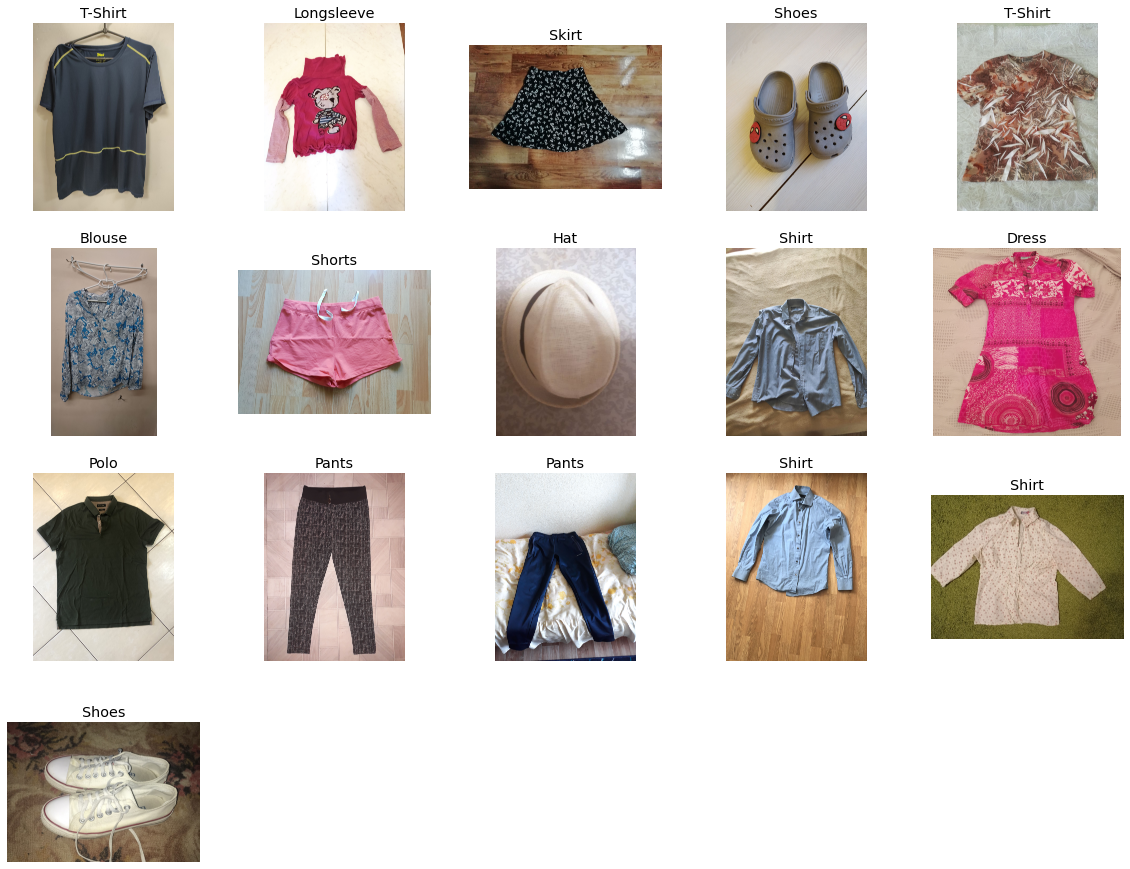

In [24]:
def show_random_training_image():
    random_index = random.choice(labels1.index)
    img_path = labels1['image'][random_index]
    label = labels1['label'][random_index]
    complete_path = dataset + '/' + img_path
    image = mpimg.imread(complete_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title(label)
plt.figure(figsize=(20, 20))
for i in range(16):
    ax = plt.subplot(5, 5, i+1)
    show_random_training_image()

# **Data Augmentation**

In [87]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

In [88]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.3,
                                  horizontal_flip=True,
                                  validation_split=0.2)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=labels1,
    directory=dataset,
    x_col='image',
    y_col='label',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='training'
)

Found 4077 validated image filenames belonging to 17 classes.


In [89]:
validation_generator = train_datagen.flow_from_dataframe(
    dataframe=labels1,
    directory=dataset,
    x_col='image',
    y_col='label',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False,
    subset='validation'
)

Found 1019 validated image filenames belonging to 17 classes.


# ResNet 50

The ResNet-50 model consists of 5 stages each with a convolution and Identity block. Each convolution block has 3 convolution layers and each identity block also has 3 convolution layers. The ResNet-50 has over 23 million trainable parameters. The fundamental breakthrough with ResNet was it allowed us to train extremely deep neural networks with 150+layers successfully. Prior to ResNet training very deep neural networks was difficult due to the problem of vanishing gradients.

ResNet first introduced the concept of skip connection. The concept is stacking convolution layers together one after the other. We still stack convolution layers as before but we now also add the original input to the output of the convolution block. This is called skip connection

The input to create the learner is a dataloader and the model 'resnet50'. The learner uses 'accuracy_multi', which calculates the accuracy for a multi-category dataset using a specified threshold. The threshold by default is 0.5, but for this model, we can start at 0.2 and then test the outcome of other threshold values.

To create the dataloader, we need to have a DataBlock that will identify the dependent (labels) and the independent (images) variables using the MultiCategoryBlock and ImageBlock respectively. Using ImageBlock will help open the image and convert to a tensor, while MultiCategoryBlock will help with the multilabel classification.

Now we are going to create functions that will be used to open the images and get the categories of the image for the DataBlock.

![image.png](https://miro.medium.com/max/1400/1*hEU7S-EiVqcmtAlj6kgfRA.png)

![image.png](https://miro.medium.com/max/1140/1*D0F3UitQ2l5Q0Ak-tjEdJg.png)

In [28]:
path = 'C:/Users/kotav/Desktop/zoffer/dataset'
def get_x(r): return path+'/images_original/'+r['image'] # create path to open images in the original folder
def get_y(r): return r['label_category'].split(' ')

In [ ]:
# Create DataBlock
dblock = DataBlock(blocks = (ImageBlock, MultiCategoryBlock),
                  get_x = get_x, get_y = get_y,
                  item_tfms = RandomResizedCrop(128, min_scale=0.35))  # ensure every item is of the same size

dls = dblock.dataloaders(new_df) # collates items from dataset into minibatches

In [ ]:
dls.show_batch(nrows=3, ncols=3)

In [108]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [127]:
pretrained_model = ResNet50(input_shape=(224, 224, 3),
                                include_top=False,
                                weights='imagenet')


In [128]:
for layer in pretrained_model.layers:
    layer.trainable = True

In [132]:
inputs = pretrained_model.input

x = pretrained_model.output
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64,name='Feature_extractor', activation='relu')(x)
outputs = tf.keras.layers.Dense(17, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [134]:
from tensorflow.keras.optimizers import Adam, SGD
model.compile(Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [135]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [137]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard
import tensorflow as tf
import datetime, os
es = tf.keras.callbacks.EarlyStopping(patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            #verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

In [140]:
history = model.fit(train_generator, 
                    epochs=10,
                    validation_data=validation_generator, 
                    callbacks= [es, learning_rate_reduction],
                    steps_per_epoch=len(train_generator) //BATCH_SIZE,
                    validation_steps=len(validation_generator) //BATCH_SIZE  )

Epoch 1/10
4/4 [==============================] - 51s 11s/step - loss: 4.5454 - accuracy: 0.1172 - val_loss: 2.9584 - val_accuracy: 0.0938
Epoch 2/10
4/4 [==============================] - 40s 10s/step - loss: 2.9852 - accuracy: 0.1953 - val_loss: 2.6877 - val_accuracy: 0.1875
Epoch 3/10
4/4 [==============================] - 40s 10s/step - loss: 2.7397 - accuracy: 0.2500 - val_loss: 2.7073 - val_accuracy: 0.2500
Epoch 4/10
4/4 [==============================] - 39s 10s/step - loss: 2.4928 - accuracy: 0.2422 - val_loss: 2.7714 - val_accuracy: 0.2500
Epoch 5/10
4/4 [==============================] - 39s 10s/step - loss: 2.5692 - accuracy: 0.2969 - val_loss: 2.7308 - val_accuracy: 0.2188
Epoch 6/10
4/4 [==============================] - 39s 10s/step - loss: 2.2759 - accuracy: 0.3203 - val_loss: 2.6975 - val_accuracy: 0.1562
Epoch 7/10
4/4 [==============================] - 38s 10s/step - loss: 2.4987 - accuracy: 0.3359 - val_loss: 2.6730 - val_accuracy: 0.0938
Epoch 8/10
4/4 [===========

# **Model Performance**

In [141]:
model.save('resnet50.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



In [142]:
loss, accuracy = model.evaluate(validation_generator, verbose=2)


32/32 - 85s - loss: 2.7637 - accuracy: 0.0707


In [143]:
print(f"Model Loss is {loss:.2f} and Accuracy is {100*np.round(accuracy, 4)}%")


Model Loss is 2.76 and Accuracy is 7.07%


In [144]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

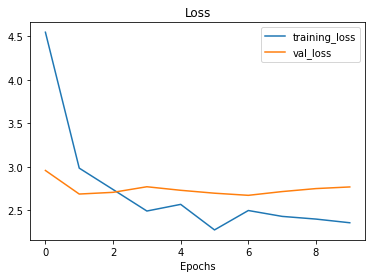

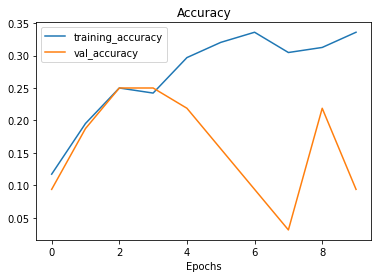

In [145]:
plot_loss_curves(history)

In [146]:
classes = list(train_generator.class_indices.keys())

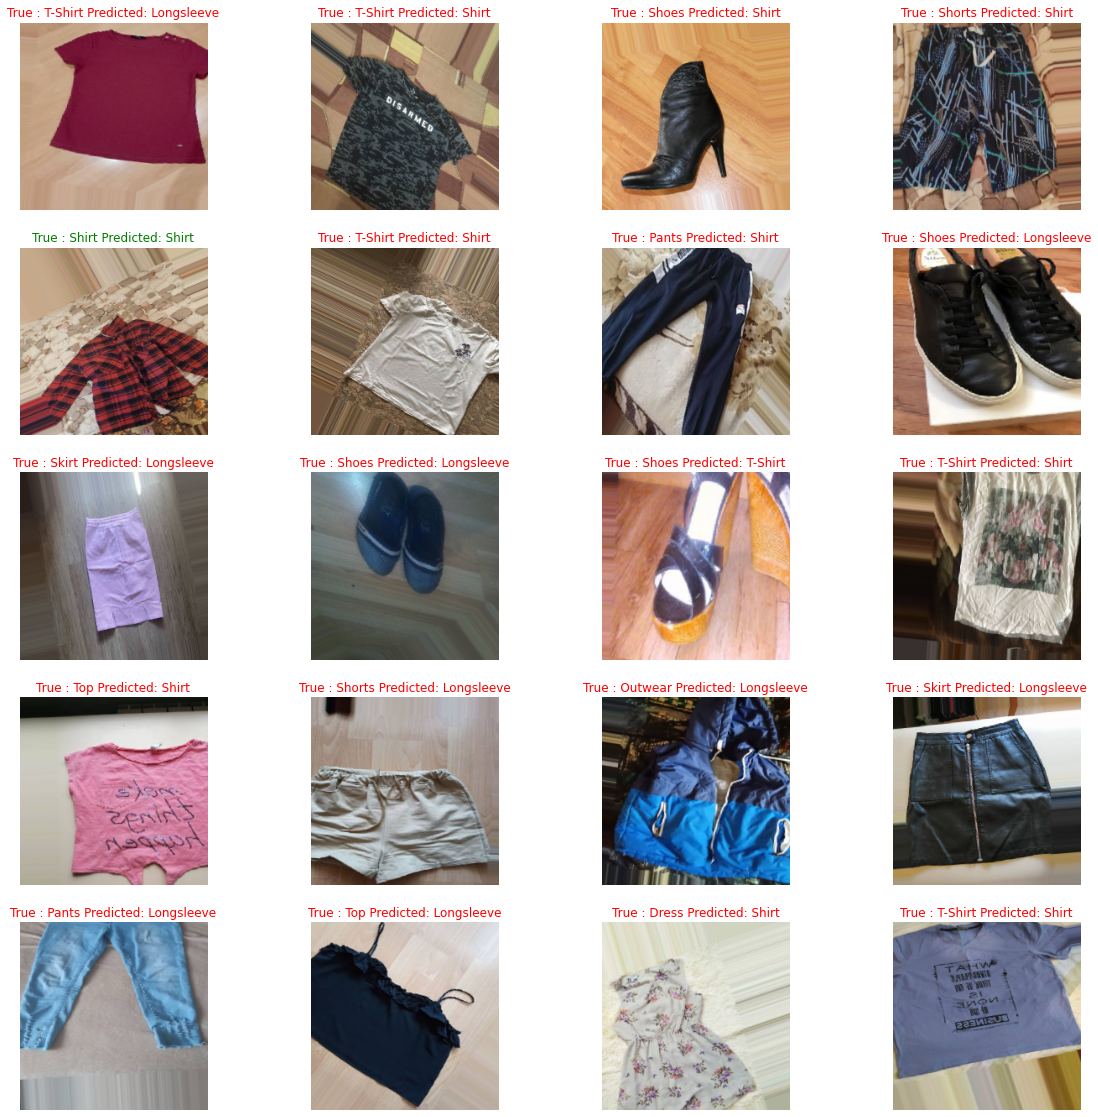

In [147]:
def predict_val_image(index):
    predictions =  model.predict(val_images, verbose=0)[index]
    true_label = classes[val_labels[index].argmax()]
    predicted_label = classes[predictions.argmax()] 

    if(true_label== predicted_label):
        color = 'green'  
    else:
        color = 'red'

    plt.title(f"True : {true_label} Predicted: {predicted_label}", color=color)
    plt.imshow(val_images[index])
    plt.axis('off')
val_images, val_labels = validation_generator.next()
plt.figure(figsize=(20, 20))
for i in range(20):
    ax = plt.subplot(5, 4, i + 1)
    predict_val_image(i)

# images which are not used for training and validation

In [149]:
custom_dir = 'C:/Users/kotav/Desktop/zoffer/images_original'

In [150]:
custom_paths = []
for image in os.listdir(custom_dir):
        custom_paths.append(custom_dir+'/'+image)

In [152]:
def predict_random_image():
    path = random.choice(custom_paths)
    image = tf.keras.preprocessing.image.load_img(path, target_size=(224, 224))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])
    input_arr = input_arr.astype('float32') / 255.
    predictions = model.predict(input_arr, verbose=0)
    series = pd.Series(predictions[0], index=classes)
    predicted_classes = np.argsort(predictions)
    predictions.sort()
    plt.title(f"{classes[predicted_classes[0][-1]]} - {round(predictions[0][-1] * 100,2)}% \n{classes[predicted_classes[0][-2]]} - {round(predictions[0][-2] * 100,2)}% \n{classes[predicted_classes[0][-3]]} - {round(predictions[0][-2] * 100,3)}%")
    plt.imshow(image)
    plt.axis('off')

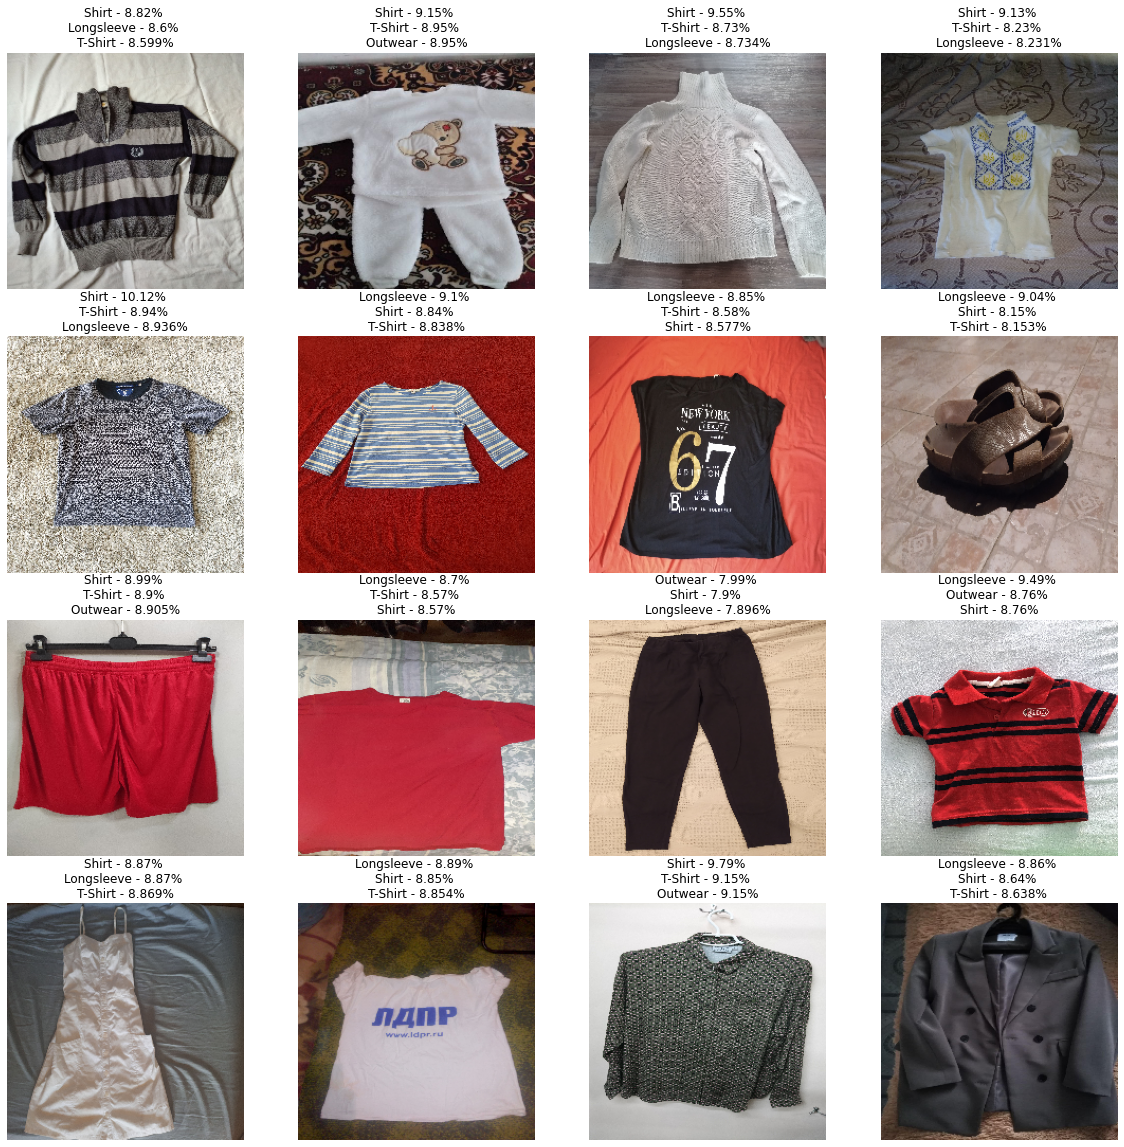

In [153]:
plt.figure(figsize=(20, 20))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    predict_random_image()